# 3D Rendering and Projection

In [1]:

import numpy as np
import matplotlib.pyplot as pyplot
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource

import os
from StringIO import StringIO

## 2D plot
In this chapter, we will load a fixed width file in local path. The file contains weather station geographic information, we will extract (longitude, latitude, elevate) and plot them on panel.

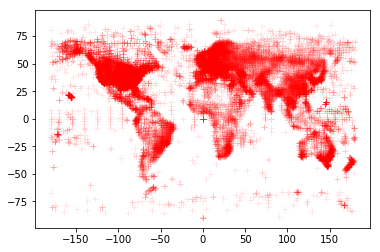

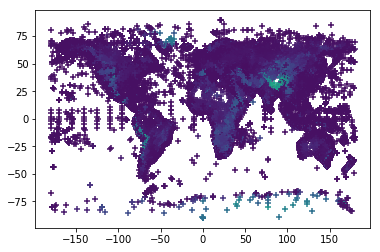

In [5]:
import os
from StringIO import StringIO

data_folder = os.path.join(os.path.expanduser('~'), 'python', 'tutorial_files','weather')
#print("{}".format(data_folder))

raw_data = open(os.path.join(data_folder,'Station.txt'), 'r').read()
#print('Raw data looks like this:')
#print(raw_data[966:1300] + '...')

stations = np.genfromtxt(\
    StringIO(raw_data),\
    delimiter=(7,6,30,3,3,3,6,7,8,10,9,9),# width of each field \
    skip_header=22, # skip 22 lines of header \
    usecols=(8, 7, 9), # reorder colums from (latitude, longitude, elevate) to (longitude, latitude, elevate) \
    missing_values="-99999,-999999", # missing_values will be replaced by numpy.nan \
    dtype=[('longitude','f8'),('latitude','f8'),('elevate','f8')], # \
    usemask=True) # required by using missing_values

longitude = [ s[0]/1000 for s in stations] # in degree
latitude = [ s[1]/1000 for s in stations] # in degree
elevate = [ s[2]/10 for s in stations] # in meter

pyplot.plot(longitude, latitude, 'r+', alpha=0.1)
pyplot.show()

pyplot.scatter(longitude, latitude, c=elevate, marker='+')
pyplot.show()

## Cylindrical Equidistant Projection
In this chapter we will load a base map from matplotlib.basemap and display it with Cylindrical Equidistant Projection.

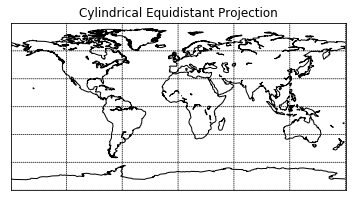

In [7]:
from mpl_toolkits.basemap import Basemap
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
#pyplot.figure(figsize=(6,4), dpi=300) 
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=10,resolution='c')
m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
#m.drawmapboundary(fill_color='aqua') # ocean
pyplot.title("Cylindrical Equidistant Projection")
pyplot.show()

## Overlap

In this chapter we will overlap the result of above 2 steps

In [ ]:
pyplot.figure(dpi=300) 
pyplot.title("Cylindrical Equidistant Projection")
#####
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=10,resolution='c')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))

#pyplot.plot(longitude, latitude, 'r+', alpha=0.1)
pyplot.scatter(longitude, latitude, c=elevate, marker='.')
#####
pyplot.show()

## 3D Rendering

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()